In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import datetime as dt
import calendar

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset
CASH_FLOW = pd.read_csv('DATASET/CASH_FLOW_01082018_31072019.csv')
CASH_FLOW.head()

,Date,Income/Expenses,Category,Memo,Amount
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0
1,28/05/2019,Expenses,Gift,NaN,-15.3
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8
3,28/05/2019,Expenses,Gift,NaN,-32.0
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0


In [3]:
# Dataset Description
CASH_FLOW.describe()

,Amount
count,622.000000
mean,1.656672
std,39.005284
min,-88.000000
25%,-5.300000
50%,-3.900000
75%,-2.800000
max,400.000000


<h2>Data Cleaning</h2>

<h3>Data Cleaning Part 1: Cleaning Memo Column</h3>
<p>Memo column contains 2 information: Item and Vendor along with the details of the Vendor Location. These columns are aimed to be separated for the purpose of data visualization.</p>

In [4]:
# Check Null Values in All Columns
CASH_FLOW.isnull().sum()

Date                0
Income/Expenses     0
Category            0
Memo               38
Amount              0
dtype: int64

In [5]:
# Separate Memo Column into Item and Location Columns
CASH_FLOW[["Item","Location"]] = CASH_FLOW["Memo"].str.split('@', expand = True)
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Memo,Amount,Item,Location
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0,Top Up Singtel Card,"7-Eleven, Clementi"
1,28/05/2019,Expenses,Gift,NaN,-15.3,NaN,NaN
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8,Bubble Tea,"Koi, Takashimaya, Orchard"
3,28/05/2019,Expenses,Gift,NaN,-32.0,NaN,NaN
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0,Korean BBQ,"I Am Kim, Rochor"
5,28/05/2019,Expenses,Gift,NaN,-8.3,NaN,NaN
6,27/05/2019,Expenses,Gift,NaN,-8.3,NaN,NaN
7,27/05/2019,Expenses,Fruits,"Juice @Boost Juice Bars, Bugis Junction, Bugis",-3.0,Juice,"Boost Juice Bars, Bugis Junction, Bugis"
8,27/05/2019,Expenses,Food,"Fried Seafood Hor Fun @Food Junction, Bugis Ju...",-6.5,Fried Seafood Hor Fun,"Food Junction, Bugis Junction, Bugis"
9,27/05/2019,Income,Cash Withdrawal,NaN,100.0,NaN,NaN


In [6]:
# Count Numbers of Entities in the Location Column
LOCATION_CHECK = []
for i in CASH_FLOW["Location"]: LOCATION_CHECK.append(str(i).count(",") + 1)
CASH_FLOW.insert(7,"Location Check", LOCATION_CHECK, True)
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0,Top Up Singtel Card,"7-Eleven, Clementi",2
1,28/05/2019,Expenses,Gift,NaN,-15.3,NaN,NaN,1
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8,Bubble Tea,"Koi, Takashimaya, Orchard",3
3,28/05/2019,Expenses,Gift,NaN,-32.0,NaN,NaN,1
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0,Korean BBQ,"I Am Kim, Rochor",2
5,28/05/2019,Expenses,Gift,NaN,-8.3,NaN,NaN,1
6,27/05/2019,Expenses,Gift,NaN,-8.3,NaN,NaN,1
7,27/05/2019,Expenses,Fruits,"Juice @Boost Juice Bars, Bugis Junction, Bugis",-3.0,Juice,"Boost Juice Bars, Bugis Junction, Bugis",3
8,27/05/2019,Expenses,Food,"Fried Seafood Hor Fun @Food Junction, Bugis Ju...",-6.5,Fried Seafood Hor Fun,"Food Junction, Bugis Junction, Bugis",3
9,27/05/2019,Income,Cash Withdrawal,NaN,100.0,NaN,NaN,1


In [7]:
# Fill Empty Location With "Blank, Blank, Blank"
CASH_FLOW = CASH_FLOW.fillna("Blank")
CASH_FLOW.loc[CASH_FLOW["Location"] == "Blank", "Location"] = "Blank, Blank, Blank"
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0,Top Up Singtel Card,"7-Eleven, Clementi",2
1,28/05/2019,Expenses,Gift,Blank,-15.3,Blank,"Blank, Blank, Blank",1
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8,Bubble Tea,"Koi, Takashimaya, Orchard",3
3,28/05/2019,Expenses,Gift,Blank,-32.0,Blank,"Blank, Blank, Blank",1
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0,Korean BBQ,"I Am Kim, Rochor",2
5,28/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1
6,27/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1
7,27/05/2019,Expenses,Fruits,"Juice @Boost Juice Bars, Bugis Junction, Bugis",-3.0,Juice,"Boost Juice Bars, Bugis Junction, Bugis",3
8,27/05/2019,Expenses,Food,"Fried Seafood Hor Fun @Food Junction, Bugis Ju...",-6.5,Fried Seafood Hor Fun,"Food Junction, Bugis Junction, Bugis",3
9,27/05/2019,Income,Cash Withdrawal,Blank,100.0,Blank,"Blank, Blank, Blank",1


In [8]:
# Fill Location Without Vendor Location with "Vendor, Blank, District" and Location without Vendor and Vendor Location with "Blank, Blank, District"
LOCATION_FIXED=[]
for i in CASH_FLOW["Location"]:
    SPLIT_STR=i.split(',')
    if len(SPLIT_STR)==1:
        FINAL_STR="Blank, Blank, {FIRST_ELEMENT}".format(FIRST_ELEMENT=SPLIT_STR[0])
        LOCATION_FIXED.append(FINAL_STR)
    elif len(SPLIT_STR)==2:
        FINAL_STR="{FIRST_ELEMENT}, Blank,{SECOND_ELEMENT}".format(FIRST_ELEMENT=SPLIT_STR[0], SECOND_ELEMENT=SPLIT_STR[1])
        LOCATION_FIXED.append(FINAL_STR)
    else:
        LOCATION_FIXED.append(i)

CASH_FLOW["Location"] = LOCATION_FIXED
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0,Top Up Singtel Card,"7-Eleven, Blank, Clementi",2
1,28/05/2019,Expenses,Gift,Blank,-15.3,Blank,"Blank, Blank, Blank",1
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8,Bubble Tea,"Koi, Takashimaya, Orchard",3
3,28/05/2019,Expenses,Gift,Blank,-32.0,Blank,"Blank, Blank, Blank",1
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0,Korean BBQ,"I Am Kim, Blank, Rochor",2
5,28/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1
6,27/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1
7,27/05/2019,Expenses,Fruits,"Juice @Boost Juice Bars, Bugis Junction, Bugis",-3.0,Juice,"Boost Juice Bars, Bugis Junction, Bugis",3
8,27/05/2019,Expenses,Food,"Fried Seafood Hor Fun @Food Junction, Bugis Ju...",-6.5,Fried Seafood Hor Fun,"Food Junction, Bugis Junction, Bugis",3
9,27/05/2019,Income,Cash Withdrawal,Blank,100.0,Blank,"Blank, Blank, Blank",1


In [9]:
# REF: https://builtin.com/data-science/pandas-filter
# Location without Vendor and Vendor Location with "Blank, Blank, District" Check
CASH_FLOW[(CASH_FLOW["Location"]==1) & (CASH_FLOW["Location"]!="Blank, Blank, Blank")]

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check


In [10]:
# Location Without Vendor Location with "Vendor, Blank, District"
CASH_FLOW[(CASH_FLOW["Location"]==2)]

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check


In [11]:
# Separate Location into 3 Columns: Vendor, Vendor Location, and District
CASH_FLOW[["Vendor","Vendor Location","District"]] = CASH_FLOW["Location"].str.split(',', expand = True)
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Memo,Amount,Item,Location,Location Check,Vendor,Vendor Location,District
0,28/05/2019,Expenses,Telephone,"Top Up Singtel Card @7-Eleven, Clementi",-10.0,Top Up Singtel Card,"7-Eleven, Blank, Clementi",2,7-Eleven,Blank,Clementi
1,28/05/2019,Expenses,Gift,Blank,-15.3,Blank,"Blank, Blank, Blank",1,Blank,Blank,Blank
2,28/05/2019,Expenses,Drinks,"Bubble Tea @Koi, Takashimaya, Orchard",-1.8,Bubble Tea,"Koi, Takashimaya, Orchard",3,Koi,Takashimaya,Orchard
3,28/05/2019,Expenses,Gift,Blank,-32.0,Blank,"Blank, Blank, Blank",1,Blank,Blank,Blank
4,28/05/2019,Expenses,Food,"Korean BBQ @I Am Kim, Rochor",-15.0,Korean BBQ,"I Am Kim, Blank, Rochor",2,I Am Kim,Blank,Rochor
5,28/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1,Blank,Blank,Blank
6,27/05/2019,Expenses,Gift,Blank,-8.3,Blank,"Blank, Blank, Blank",1,Blank,Blank,Blank
7,27/05/2019,Expenses,Fruits,"Juice @Boost Juice Bars, Bugis Junction, Bugis",-3.0,Juice,"Boost Juice Bars, Bugis Junction, Bugis",3,Boost Juice Bars,Bugis Junction,Bugis
8,27/05/2019,Expenses,Food,"Fried Seafood Hor Fun @Food Junction, Bugis Ju...",-6.5,Fried Seafood Hor Fun,"Food Junction, Bugis Junction, Bugis",3,Food Junction,Bugis Junction,Bugis
9,27/05/2019,Income,Cash Withdrawal,Blank,100.0,Blank,"Blank, Blank, Blank",1,Blank,Blank,Blank


In [12]:
# Drop Memo, Location, Location Check, and Location Fixed
CASH_FLOW = CASH_FLOW.drop(columns=["Memo","Location","Location Check"])
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Amount,Item,Vendor,Vendor Location,District
0,28/05/2019,Expenses,Telephone,-10.0,Top Up Singtel Card,7-Eleven,Blank,Clementi
1,28/05/2019,Expenses,Gift,-15.3,Blank,Blank,Blank,Blank
2,28/05/2019,Expenses,Drinks,-1.8,Bubble Tea,Koi,Takashimaya,Orchard
3,28/05/2019,Expenses,Gift,-32.0,Blank,Blank,Blank,Blank
4,28/05/2019,Expenses,Food,-15.0,Korean BBQ,I Am Kim,Blank,Rochor
5,28/05/2019,Expenses,Gift,-8.3,Blank,Blank,Blank,Blank
6,27/05/2019,Expenses,Gift,-8.3,Blank,Blank,Blank,Blank
7,27/05/2019,Expenses,Fruits,-3.0,Juice,Boost Juice Bars,Bugis Junction,Bugis
8,27/05/2019,Expenses,Food,-6.5,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis
9,27/05/2019,Income,Cash Withdrawal,100.0,Blank,Blank,Blank,Blank


<h3>Data Cleaning Part 2: Item Column</h3>
<p>Item Column is arranged, so that the column does not contain blank values. If the a row happens to have "Blank" value on the Item column, the item column will take the value from the Category column.</p>

In [13]:
# Copy the Values from the Category if the Value in the Item Column is "Blank"
CASH_FLOW.loc[CASH_FLOW["Item"]=="Blank","Item"] = CASH_FLOW.loc[CASH_FLOW["Item"]=="Blank","Category"]
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Amount,Item,Vendor,Vendor Location,District
0,28/05/2019,Expenses,Telephone,-10.0,Top Up Singtel Card,7-Eleven,Blank,Clementi
1,28/05/2019,Expenses,Gift,-15.3,Gift,Blank,Blank,Blank
2,28/05/2019,Expenses,Drinks,-1.8,Bubble Tea,Koi,Takashimaya,Orchard
3,28/05/2019,Expenses,Gift,-32.0,Gift,Blank,Blank,Blank
4,28/05/2019,Expenses,Food,-15.0,Korean BBQ,I Am Kim,Blank,Rochor
5,28/05/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank
6,27/05/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank
7,27/05/2019,Expenses,Fruits,-3.0,Juice,Boost Juice Bars,Bugis Junction,Bugis
8,27/05/2019,Expenses,Food,-6.5,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis
9,27/05/2019,Income,Cash Withdrawal,100.0,Cash Withdrawal,Blank,Blank,Blank


<h3>Data Cleaning Part 3: Date Column</h3>
<p>The following information will be extracted from the Date column:
<ul>
    <li>The Name of the Day</li>
    <li>The Week Number (WW)</li>
    <li>Month (MM)</li>
    <li>Year (YYYY)</li>
</ul>
</p>

In [14]:
# Date Formatting on the "Date" Column and Generate "Day" and "Week" Columns Referring to Day of the Week and Week Number of the Year Respectively
DATE_FIXED = []
for date in CASH_FLOW["Date"]:
    DATE_OBJECT = dt.datetime.strptime(str(date),'%d/%m/%Y')
    WEEK_NUMBER = DATE_OBJECT.isocalendar()[1]
    DATE_FIX = """{} W{} {}/{}/{}""".format(DATE_OBJECT.weekday(), WEEK_NUMBER, DATE_OBJECT.day, DATE_OBJECT.month, DATE_OBJECT.year)
    DATE_FIXED.append(DATE_FIX)
    
CASH_FLOW.insert(8,"Date Fixed", DATE_FIXED, True)
CASH_FLOW[["Day","Week","Date"]] = CASH_FLOW["Date Fixed"].str.split(' ', expand = True)
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Amount,Item,Vendor,Vendor Location,District,Date Fixed,Day,Week
0,28/5/2019,Expenses,Telephone,-10.0,Top Up Singtel Card,7-Eleven,Blank,Clementi,1 W22 28/5/2019,1,W22
1,28/5/2019,Expenses,Gift,-15.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,1,W22
2,28/5/2019,Expenses,Drinks,-1.8,Bubble Tea,Koi,Takashimaya,Orchard,1 W22 28/5/2019,1,W22
3,28/5/2019,Expenses,Gift,-32.0,Gift,Blank,Blank,Blank,1 W22 28/5/2019,1,W22
4,28/5/2019,Expenses,Food,-15.0,Korean BBQ,I Am Kim,Blank,Rochor,1 W22 28/5/2019,1,W22
5,28/5/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,1,W22
6,27/5/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,0 W22 27/5/2019,0,W22
7,27/5/2019,Expenses,Fruits,-3.0,Juice,Boost Juice Bars,Bugis Junction,Bugis,0 W22 27/5/2019,0,W22
8,27/5/2019,Expenses,Food,-6.5,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis,0 W22 27/5/2019,0,W22
9,27/5/2019,Income,Cash Withdrawal,100.0,Cash Withdrawal,Blank,Blank,Blank,0 W22 27/5/2019,0,W22


In [15]:
# Map the Day Column from Number of the Day to the Name of the Day 
DAY_MAPPING = dict(enumerate(calendar.day_name))
CASH_FLOW['Day'] = CASH_FLOW['Day'].astype(int).replace(DAY_MAPPING)
CASH_FLOW.head(10)

,Date,Income/Expenses,Category,Amount,Item,Vendor,Vendor Location,District,Date Fixed,Day,Week
0,28/5/2019,Expenses,Telephone,-10.0,Top Up Singtel Card,7-Eleven,Blank,Clementi,1 W22 28/5/2019,Tuesday,W22
1,28/5/2019,Expenses,Gift,-15.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22
2,28/5/2019,Expenses,Drinks,-1.8,Bubble Tea,Koi,Takashimaya,Orchard,1 W22 28/5/2019,Tuesday,W22
3,28/5/2019,Expenses,Gift,-32.0,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22
4,28/5/2019,Expenses,Food,-15.0,Korean BBQ,I Am Kim,Blank,Rochor,1 W22 28/5/2019,Tuesday,W22
5,28/5/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22
6,27/5/2019,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,0 W22 27/5/2019,Monday,W22
7,27/5/2019,Expenses,Fruits,-3.0,Juice,Boost Juice Bars,Bugis Junction,Bugis,0 W22 27/5/2019,Monday,W22
8,27/5/2019,Expenses,Food,-6.5,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis,0 W22 27/5/2019,Monday,W22
9,27/5/2019,Income,Cash Withdrawal,100.0,Cash Withdrawal,Blank,Blank,Blank,0 W22 27/5/2019,Monday,W22


In [16]:
# Extract Month & Year from the Date
CASH_FLOW['Date'] = pd.to_datetime(CASH_FLOW['Date'])
CASH_FLOW['Year'], CASH_FLOW['Month'] = CASH_FLOW['Date'].dt.year, CASH_FLOW['Date'].dt.month
CASH_FLOW.head(10)

C:\Users\Ferdy Arianto Wiyogo\AppData\Local\Temp\ipykernel_19012\2423196077.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  CASH_FLOW['Date'] = pd.to_datetime(CASH_FLOW['Date'])


,Date,Income/Expenses,Category,Amount,Item,Vendor,Vendor Location,District,Date Fixed,Day,Week,Year,Month
0,2019-05-28,Expenses,Telephone,-10.0,Top Up Singtel Card,7-Eleven,Blank,Clementi,1 W22 28/5/2019,Tuesday,W22,2019,5
1,2019-05-28,Expenses,Gift,-15.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22,2019,5
2,2019-05-28,Expenses,Drinks,-1.8,Bubble Tea,Koi,Takashimaya,Orchard,1 W22 28/5/2019,Tuesday,W22,2019,5
3,2019-05-28,Expenses,Gift,-32.0,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22,2019,5
4,2019-05-28,Expenses,Food,-15.0,Korean BBQ,I Am Kim,Blank,Rochor,1 W22 28/5/2019,Tuesday,W22,2019,5
5,2019-05-28,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,1 W22 28/5/2019,Tuesday,W22,2019,5
6,2019-05-27,Expenses,Gift,-8.3,Gift,Blank,Blank,Blank,0 W22 27/5/2019,Monday,W22,2019,5
7,2019-05-27,Expenses,Fruits,-3.0,Juice,Boost Juice Bars,Bugis Junction,Bugis,0 W22 27/5/2019,Monday,W22,2019,5
8,2019-05-27,Expenses,Food,-6.5,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis,0 W22 27/5/2019,Monday,W22,2019,5
9,2019-05-27,Income,Cash Withdrawal,100.0,Cash Withdrawal,Blank,Blank,Blank,0 W22 27/5/2019,Monday,W22,2019,5


In [17]:
# Data Frame Rearrangement
CASH_FLOW = CASH_FLOW[["Date","Year","Month","Week","Day","Category","Item","Vendor","Vendor Location","District","Income/Expenses","Amount"]]
CASH_FLOW.head(10)

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
0,2019-05-28,2019,5,W22,Tuesday,Telephone,Top Up Singtel Card,7-Eleven,Blank,Clementi,Expenses,-10.0
1,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,-15.3
2,2019-05-28,2019,5,W22,Tuesday,Drinks,Bubble Tea,Koi,Takashimaya,Orchard,Expenses,-1.8
3,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,-32.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,-15.0
5,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,-8.3
6,2019-05-27,2019,5,W22,Monday,Gift,Gift,Blank,Blank,Blank,Expenses,-8.3
7,2019-05-27,2019,5,W22,Monday,Fruits,Juice,Boost Juice Bars,Bugis Junction,Bugis,Expenses,-3.0
8,2019-05-27,2019,5,W22,Monday,Food,Fried Seafood Hor Fun,Food Junction,Bugis Junction,Bugis,Expenses,-6.5
9,2019-05-27,2019,5,W22,Monday,Cash Withdrawal,Cash Withdrawal,Blank,Blank,Blank,Income,100.0


In [18]:
# Data Frame Rearrangement
AMOUNT_FIXED = []
for i in CASH_FLOW["Amount"]:
    if i < 0:
        AMOUNT_FIXED.append(np.abs(i))
    else:
         AMOUNT_FIXED.append(i)
CASH_FLOW["Amount"] = AMOUNT_FIXED
CASH_FLOW

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
0,2019-05-28,2019,5,W22,Tuesday,Telephone,Top Up Singtel Card,7-Eleven,Blank,Clementi,Expenses,10.0
1,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,15.3
2,2019-05-28,2019,5,W22,Tuesday,Drinks,Bubble Tea,Koi,Takashimaya,Orchard,Expenses,1.8
3,2019-05-28,2019,5,W22,Tuesday,Gift,Gift,Blank,Blank,Blank,Expenses,32.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,2018-10-29,2018,10,W44,Monday,Food,Spaghetti,Ngee Ann Polytechnic,Blank,Clementi,Expenses,5.0
618,2018-10-29,2018,10,W44,Monday,Food,Mixed Rice,Food Clique,SIM,Clementi,Expenses,3.6
619,2018-10-28,2018,10,W43,Sunday,Fruits,Juice,Boost Juice Bars,Northpoint Shopping Centre,Yishun,Expenses,2.5
620,2018-10-28,2018,10,W43,Sunday,Food,Mixed Rice,Kopitiam,Northpoint Shopping Centre,Yishun,Expenses,4.7


In [19]:
# Check Null Values in All Columns
CASH_FLOW.isnull().sum()

Date               0
Year               0
Month              0
Week               0
Day                0
Category           0
Item               0
Vendor             0
Vendor Location    0
District           0
Income/Expenses    0
Amount             0
dtype: int64

In [20]:
# Check Data Type for All Columns
CASH_FLOW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             622 non-null    datetime64[ns]
 1   Year             622 non-null    int32         
 2   Month            622 non-null    int32         
 3   Week             622 non-null    object        
 4   Day              622 non-null    object        
 5   Category         622 non-null    object        
 6   Item             622 non-null    object        
 7   Vendor           622 non-null    object        
 8   Vendor Location  622 non-null    object        
 9   District         622 non-null    object        
 10  Income/Expenses  622 non-null    object        
 11  Amount           622 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 53.6+ KB


<h2>Data Visualization</h2>

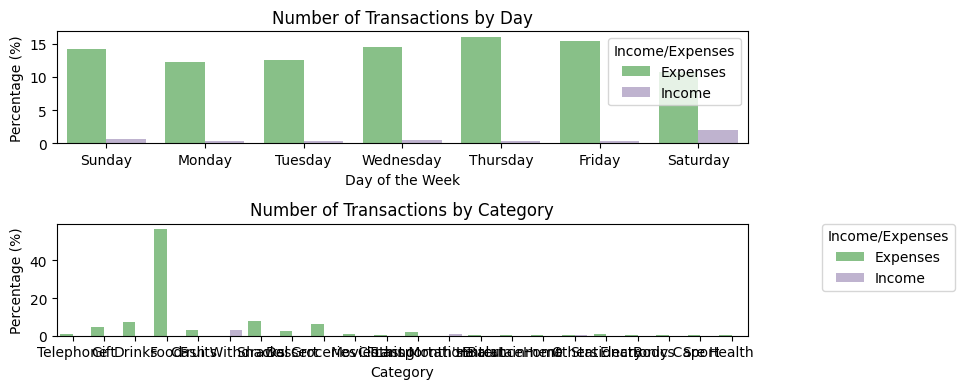

In [21]:
# Number of Transactions by Day in %
DAY_SORTED = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

fig, ax =plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

CASH_FLOW_PERCENT_DAY_COUNTPLOT = sns.countplot(
    x = "Day", 
    hue = "Income/Expenses",
    order = DAY_SORTED, 
    data = CASH_FLOW, 
    palette = "Accent",
    stat = "percent",
    ax = ax[0]
)

CASH_FLOW_PERCENT_DAY_COUNTPLOT.set(
    xlabel = "Day of the Week",
    ylabel = "Percentage (%)",
    title = "Number of Transactions by Day"
)

CASH_FLOW_PERCENT_CATEGORY_COUNTPLOT = sns.countplot(
    x = "Category", 
    hue = "Income/Expenses",
    data = CASH_FLOW, 
    palette = "Accent",
    stat = "percent",
    ax = ax[1]
)

CASH_FLOW_PERCENT_CATEGORY_COUNTPLOT.set(
    xlabel = "Category",
    ylabel = "Percentage (%)",
    title = "Number of Transactions by Category"
)


plt.legend(
    bbox_to_anchor = (1.3, 1),
    loc = "upper right",
    borderaxespad = 0,
    title = "Income/Expenses"
)

fig.tight_layout()

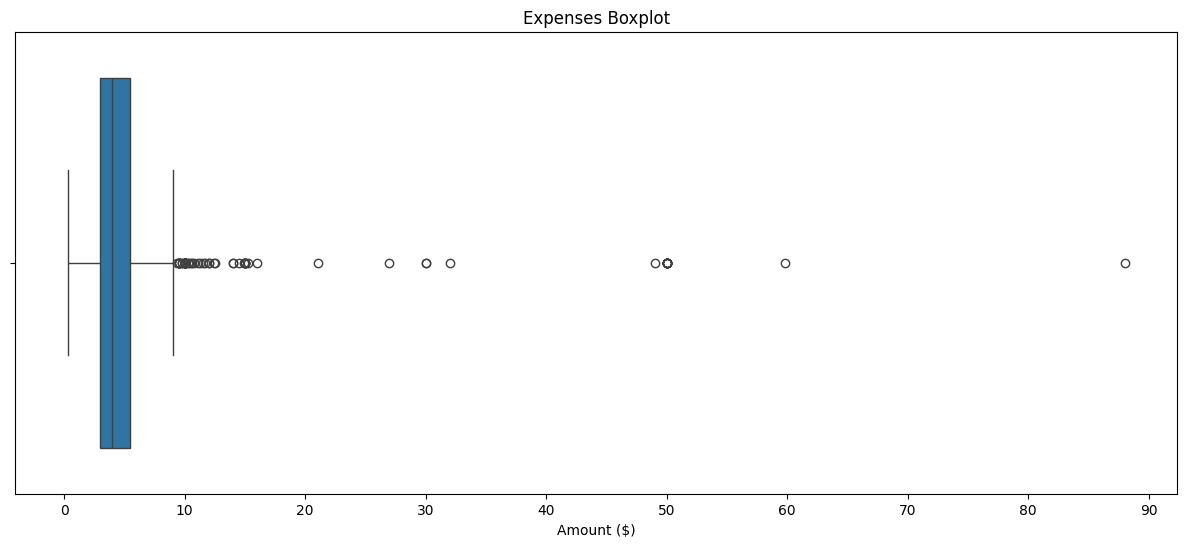

In [22]:
# Boxplot for Expenses
plt.figure(figsize=(15,6))

BOXPLOT_EXPENSES = sns.boxplot(CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"]['Amount'], orient = "y")

BOXPLOT_EXPENSES.set(
    xlabel = "Amount ($)",
    title = "Expenses Boxplot"
)

plt.xticks(np.arange(0, max(CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"]['Amount']) + 10, 10))
fig.tight_layout()

In [23]:
CASH_FLOW[CASH_FLOW['Income/Expenses'] == "Expenses"].sort_values(by = 'Amount', ascending = False).head(10)

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
502,2018-12-08,2018,12,W49,Saturday,Entertainment,Universal Studio Ticket,Blank,Blank,Blank,Expenses,88.0
366,2019-01-27,2019,1,W4,Sunday,Gift,Gift,Blank,Blank,Blank,Expenses,59.8
507,2018-12-07,2018,12,W49,Friday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
612,2018-10-31,2018,10,W44,Wednesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
58,2019-05-12,2019,5,W19,Sunday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
558,2018-11-18,2018,11,W46,Sunday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
452,2018-12-25,2018,12,W52,Tuesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
284,2019-02-28,2019,2,W9,Thursday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
170,2019-04-03,2019,4,W14,Wednesday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0
121,2019-04-20,2019,4,W16,Saturday,Transportation,Top Up Ezlink Card,Blank,Blank,Blank,Expenses,50.0


In [24]:
# Exclude Outliers for the Boxplot Visualization
CASH_FLOW_BOXPLOT = CASH_FLOW[(CASH_FLOW['Income/Expenses'] == "Expenses") & (CASH_FLOW["Category"]!="Entertainment") & (CASH_FLOW["Category"]!="Transportation") & (CASH_FLOW["Category"]!="Gift")].sort_values(by = 'Amount', ascending = False).head(10)
CASH_FLOW_BOXPLOT

,Date,Year,Month,Week,Day,Category,Item,Vendor,Vendor Location,District,Income/Expenses,Amount
283,2019-02-28,2019,2,W9,Thursday,Home,AC Service Fee for 4 Months,Blank,Blank,Blank,Expenses,30.0
247,2019-03-10,2019,3,W10,Sunday,Others,Others,Blank,Blank,Blank,Expenses,30.0
316,2019-02-17,2019,2,W7,Sunday,Food,Pizza,Pizza Hut,Westgate,Jurong East,Expenses,21.1
21,2019-05-23,2019,5,W21,Thursday,Groceries,Groceries,Cold Storage,Takashimaya,Orchard,Expenses,16.0
31,2019-05-20,2019,5,W21,Monday,Clothing,T-Shirt,Uniqlo,ION Orchard,Orchard,Expenses,15.0
461,2018-12-22,2018,12,W51,Saturday,Food,Cream & Hayashi Omelette Rice,OMU Rice,Suntec City,Promenade,Expenses,15.0
4,2019-05-28,2019,5,W22,Tuesday,Food,Korean BBQ,I Am Kim,Blank,Rochor,Expenses,15.0
173,2019-04-02,2019,4,W14,Tuesday,Clothing,Clothing,Uniqlo,ION Orchard,Orchard,Expenses,14.9
359,2019-01-29,2019,1,W5,Tuesday,Body Care,Lifebuoy's C.FRH BW HE 1L,Fairprice Finest,Clementi Mall,Clementi,Expenses,14.0
457,2018-12-24,2018,12,W52,Monday,Food,Pasta + Pizza,Loui's Pizza,Universal Studio,Harbourfront,Expenses,14.0


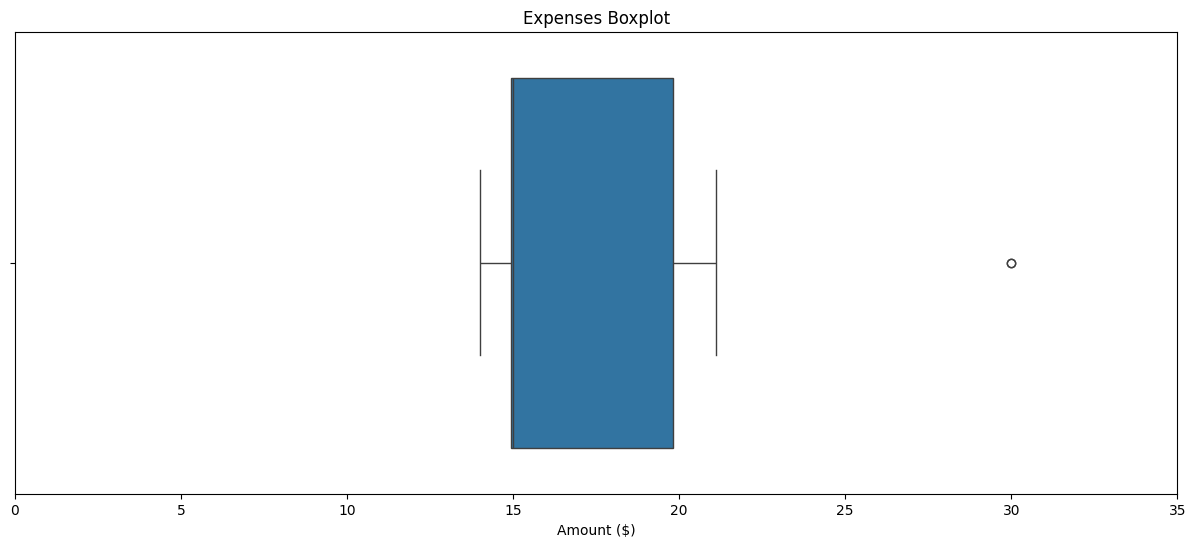

In [25]:
# Boxplot for Expenses
plt.figure(figsize=(15,6))

BOXPLOT_EXPENSES = sns.boxplot(
    CASH_FLOW_BOXPLOT['Amount'], 
    orient = "y"
)

BOXPLOT_EXPENSES.set(
    xlabel = "Amount ($)",
    title = "Expenses Boxplot"
)

plt.xticks(np.arange(0, max(CASH_FLOW_BOXPLOT['Amount']) + 10, 5))
fig.tight_layout()